# Warranty Claims Fraud Prediction

The aim of this project is to analyze the warranty claims based on their region, product, claim value and other features to predict their authenticity. The dataset is taken from Kaggle. 

### Data Dictionary
| Column Name | Description |
| --- | --- |
|Unnamed: 0| Index|
|Region| Region of the claim|
|State| State of the claim|
|Area| Area of the claim|
|City| City of the claim|
|Consumer_profile| Consumer profile Business/Personal|
|Product_category| Product category Household/Entertainment|
|Product_type| Product type AC/TV|
|AC_1001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|AC_1003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2001_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2002_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|TV_2003_Issue| 1 0- No issue / No componenent, 1- repair, 2-replacement|
|Claim_Value| Claim value in INR|
|Service_Center| Service center code|
|Product_Age| Product age in days|
|Purchased_from| Purchased from - Dealer, Manufacturer, Internet|
|Call_details| Call duration|
|Purpose| Purpose of the call|
|Fraud| Fraudulent (1) or Genuine (0)|

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [2]:
#Loading the dataset
df = pd.read_csv('warranty_claims.csv')
df.head()

,Unnamed: 0,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,...,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,7957,North East,Assam,Rural,Guwhati,Personal,Household,AC,0,1,...,0,0,0,4474.0,12,202,Manufacturer,30.0,Claim,0
1,1396,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,0,0,...,1,1,1,25000.0,13,60,Dealer,1.3,Complaint,0
2,7582,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,0,0,...,0,0,0,10000.0,12,3,Dealer,2.5,Claim,0
3,5824,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,0,0,...,1,1,0,4216.0,10,672,Dealer,25.0,Other,0
4,4086,South West,Kerala,Rural,Kochi,Business,Household,AC,0,0,...,0,0,0,20000.0,13,3,Manufacturer,6.5,Claim,0


## Data Preprocessing Part 1

In [3]:
# checking the shape of the dataset
df.shape

(8341, 21)

In [4]:
# Drop index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Checking for null/missing values
df.isnull().sum()

Region                0
State                 0
Area                  0
City                  0
Consumer_profile      0
Product_category      0
Product_type          0
AC_1001_Issue         0
AC_1002_Issue         0
AC_1003_Issue         0
TV_2001_Issue         0
TV_2002_Issue         0
TV_2003_Issue         0
Claim_Value         240
Service_Centre        0
Product_Age           0
Purchased_from        0
Call_details          0
Purpose               0
Fraud                 0
dtype: int64

In [6]:
# Checking for duplicate values
df.duplicated().sum()

np.int64(7985)

In [7]:
# Checking the data types
df.dtypes

Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object

In [8]:
# Unique values in each column
df.nunique()

Region                8
State                22
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         105
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               4
Fraud                 2
dtype: int64

In [9]:
# renaming the values in product issue column
df['AC_1001_Issue'] = df['AC_1001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1002_Issue'] = df['AC_1002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['AC_1003_Issue'] = df['AC_1003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2001_Issue'] = df['TV_2001_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2002_Issue'] = df['TV_2002_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})
df['TV_2003_Issue'] = df['TV_2003_Issue'].map({ 0 : 'No Issue', 1 : 'repair', 2 : 'replacement'})

#### Descriptive Statistics

In [10]:
df.describe()

,Claim_Value,Service_Centre,Product_Age,Call_details,Fraud
count,8101.000000,8341.000000,8341.000000,8341.000000,8341.000000
mean,14051.151586,12.832154,168.595013,10.709076,0.079847
std,13200.318156,1.724802,237.713181,11.610211,0.271072
min,0.000000,10.000000,3.000000,0.500000,0.000000
25%,4862.000000,12.000000,10.000000,1.500000,0.000000
50%,10000.000000,13.000000,21.000000,2.600000,0.000000
75%,20000.000000,14.000000,284.000000,22.000000,0.000000
max,50000.000000,16.000000,991.000000,30.000000,1.000000


In [11]:
df.head()

,Region,State,Area,City,Consumer_profile,Product_category,Product_type,AC_1001_Issue,AC_1002_Issue,AC_1003_Issue,TV_2001_Issue,TV_2002_Issue,TV_2003_Issue,Claim_Value,Service_Centre,Product_Age,Purchased_from,Call_details,Purpose,Fraud
0,North East,Assam,Rural,Guwhati,Personal,Household,AC,No Issue,repair,replacement,No Issue,No Issue,No Issue,4474.0,12,202,Manufacturer,30.0,Claim,0
1,East,Delhi,Urban,New Delhi,Personal,Entertainment,TV,No Issue,No Issue,No Issue,repair,repair,repair,25000.0,13,60,Dealer,1.3,Complaint,0
2,West,Andhra Pradesh,Rural,Hyderabad,Business,Household,AC,No Issue,No Issue,No Issue,No Issue,No Issue,No Issue,10000.0,12,3,Dealer,2.5,Claim,0
3,West,Gujarat,Rural,Ahmedabad,Personal,Entertainment,TV,No Issue,No Issue,No Issue,repair,repair,No Issue,4216.0,10,672,Dealer,25.0,Other,0
4,South West,Kerala,Rural,Kochi,Business,Household,AC,No Issue,No Issue,No Issue,No Issue,No Issue,No Issue,20000.0,13,3,Manufacturer,6.5,Claim,0


## Exploratory Data Analysis

### Location based Distribution of Fraudulent Claims

[Text(0.5, 1.0, 'Areawise Distribution of Fraudulent Claims')]

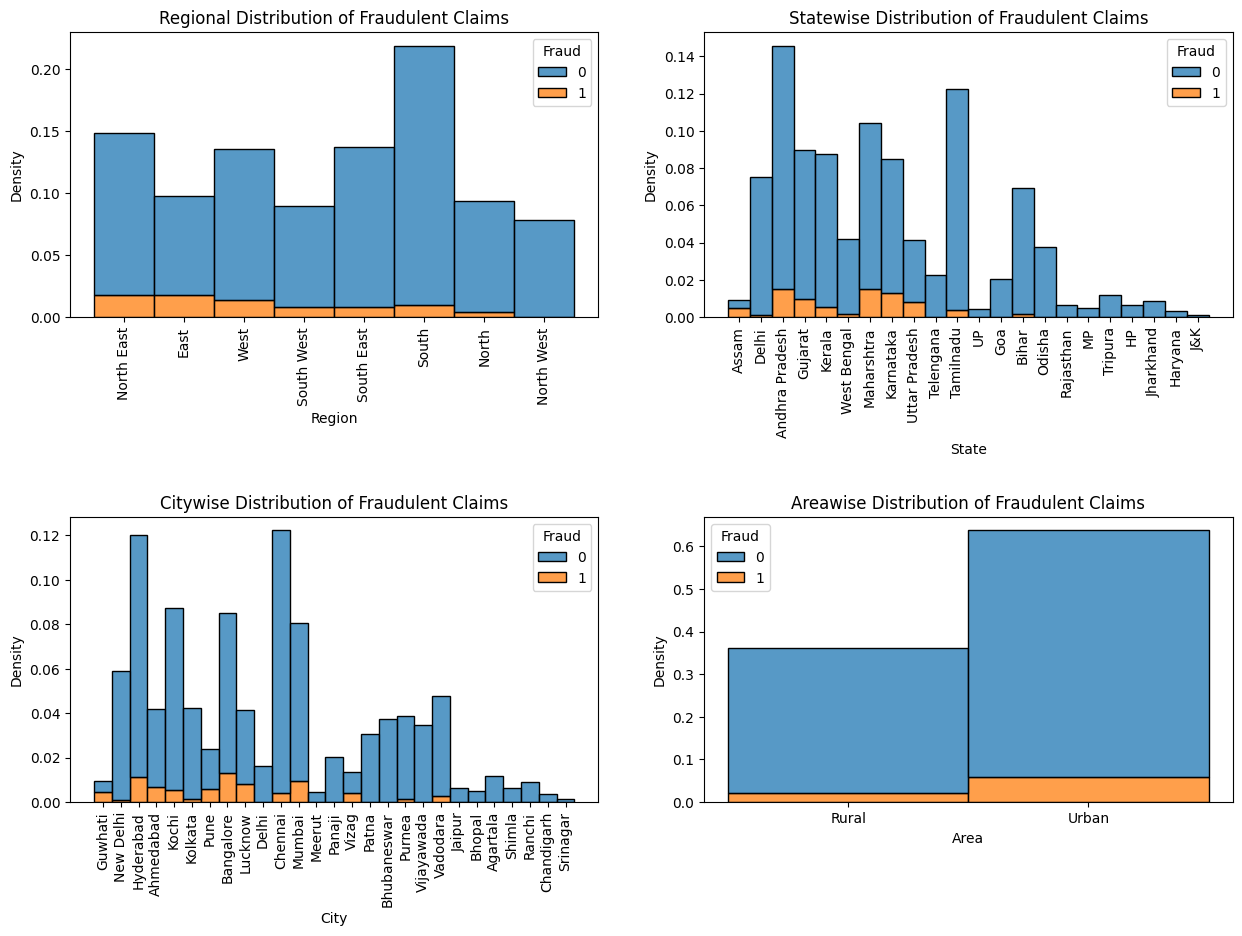

In [12]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x = 'Region', data = df, ax =ax[0,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'State', data = df, ax =ax[0,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0,1].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'City', data = df, ax =ax[1,0], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1,0].xaxis.set_tick_params(rotation=90)

sns.histplot(x = 'Area', data = df, ax =ax[1,1], hue = 'Fraud', element='bars', fill=True, stat='density',multiple='stack').set(title='Areawise Distribution of Fraudulent Claims')


### Consumer Profile and Fraudulent Claims

Text(0.5, 1.0, 'Consumer Profile distribution')

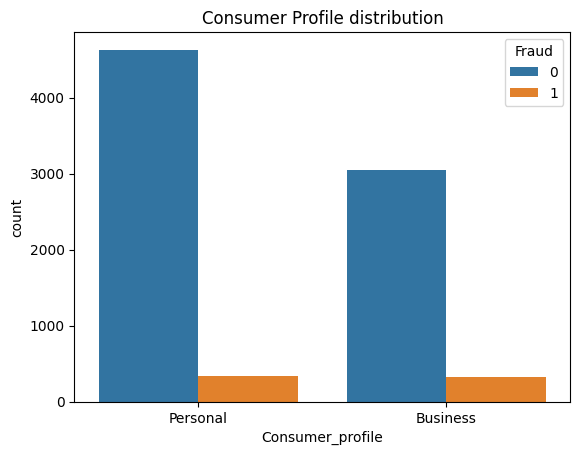

In [13]:
sns.countplot(x = 'Consumer_profile', data = df, hue = 'Fraud').set_title('Consumer Profile distribution')

### Product and Fraudulent Claims

Text(0.5, 1.0, 'Product and Fraud Distribution')

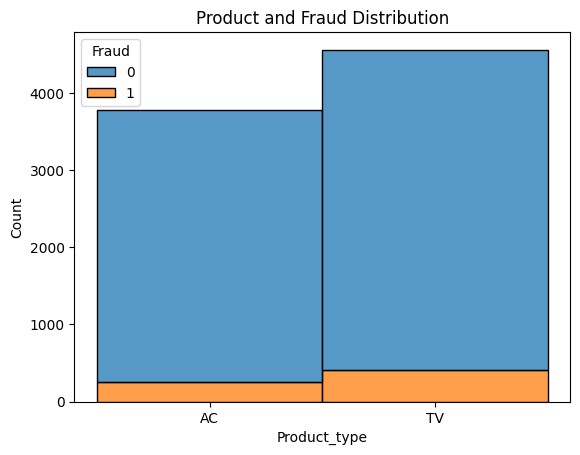

In [14]:
sns.histplot(x = 'Product_type', data = df, hue = 'Fraud', multiple='stack').set_title('Product and Fraud Distribution')

### Issue with the Product Parts and Fraudulent Claims

[Text(0.5, 1.0, 'TV_2003_Issue and Fraud Distribution')]

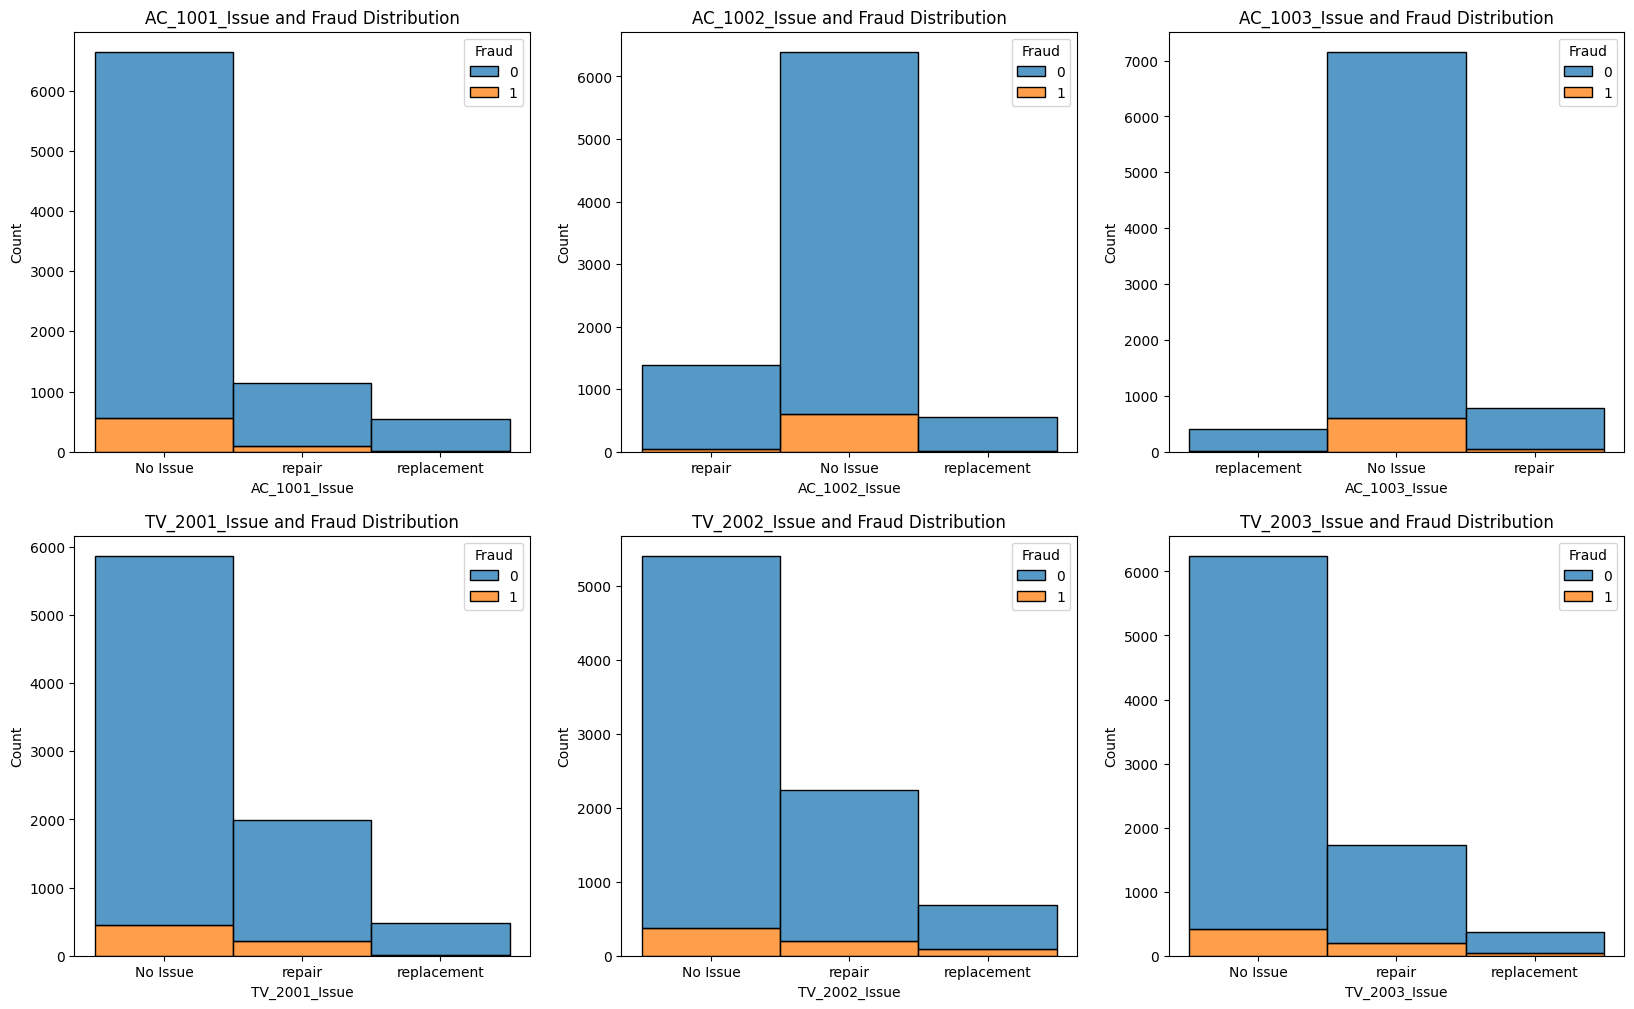

In [15]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.histplot(x = 'AC_1001_Issue', data = df, ax =ax[0,0], hue = 'Fraud', multiple='stack').set(title='AC_1001_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1002_Issue', data = df, ax =ax[0,1], hue = 'Fraud', multiple='stack').set(title='AC_1002_Issue and Fraud Distribution')

sns.histplot(x = 'AC_1003_Issue', data = df, ax =ax[0,2], hue = 'Fraud', multiple='stack').set(title='AC_1003_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2001_Issue', data = df, ax =ax[1,0], hue = 'Fraud', multiple='stack').set(title='TV_2001_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2002_Issue', data = df, ax =ax[1,1], hue = 'Fraud', multiple='stack').set(title='TV_2002_Issue and Fraud Distribution')

sns.histplot(x = 'TV_2003_Issue', data = df, ax =ax[1,2], hue = 'Fraud', multiple='stack').set(title='TV_2003_Issue and Fraud Distribution')

### Service Center and Fraudulent Claims

Text(0.5, 1.0, 'Service Centre and Fraudulent Claims')

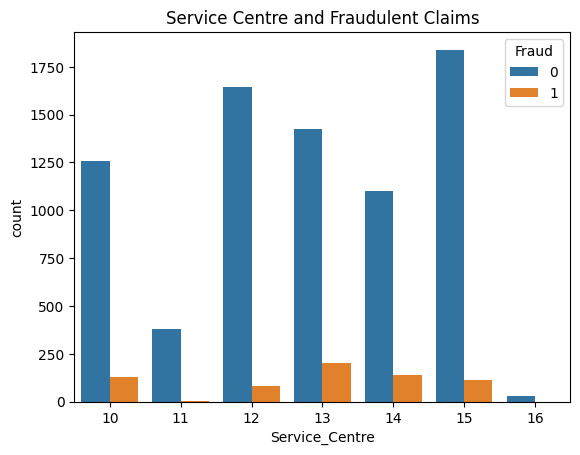

In [16]:
sns.countplot(x = 'Service_Centre', data = df, hue = 'Fraud').set_title('Service Centre and Fraudulent Claims')

### Claim Value and Fraudulent Claims

Text(0.5, 1.0, 'Claim Value and Fraudulent Claims')

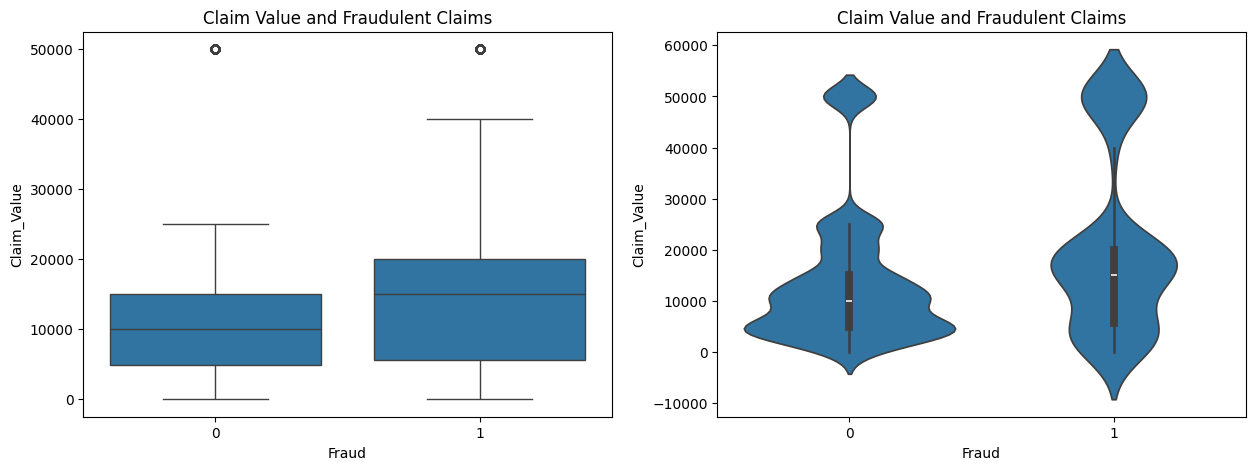

In [17]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[0]).set_title('Claim Value and Fraudulent Claims')

sns.violinplot(x = 'Fraud', y = 'Claim_Value', data = df, ax =ax[1]).set_title('Claim Value and Fraudulent Claims')

### Product Age and Fraudulent Claims

Text(0.5, 1.0, 'Product Age(in days) and Fraud Distribution')

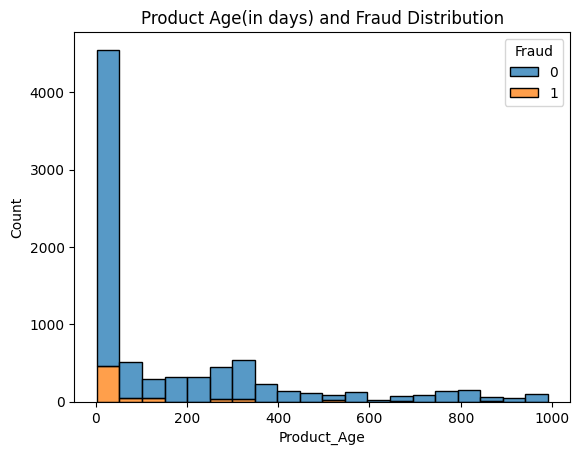

In [18]:
sns.histplot(x = 'Product_Age', data = df, hue = 'Fraud', multiple='stack', bins = 20).set_title('Product Age(in days) and Fraud Distribution')

### Purchase point and Fraudulent Claims

Text(0.5, 1.0, 'Purchased from and Fraudulent Claims')

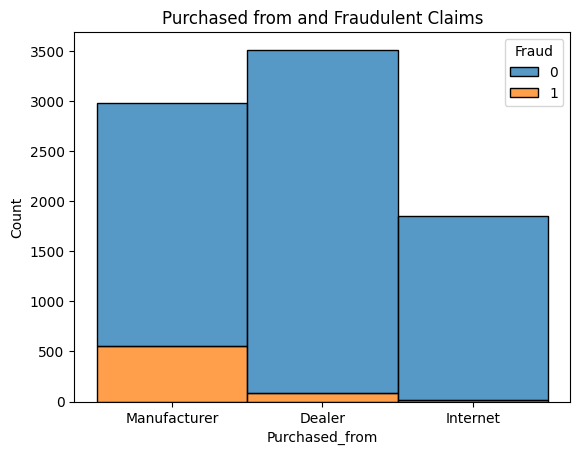

In [19]:
sns.histplot(x = 'Purchased_from', data = df, hue = 'Fraud', multiple='stack').set_title('Purchased from and Fraudulent Claims')

### Call Duration and Fraudulent Claims

Text(0.5, 0, 'Call Duration(in mins)')

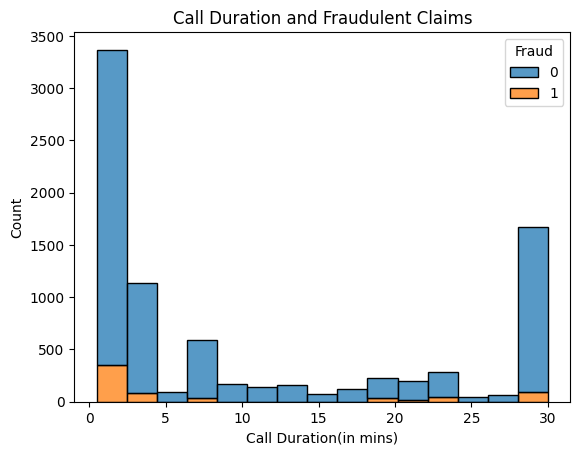

In [20]:
sns.histplot(x = 'Call_details', data = df, hue = 'Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration(in mins)')

### Purpose of contact and Fraudulent Claims

Text(0.5, 1.0, 'Purpose and Fraudulent Claims')

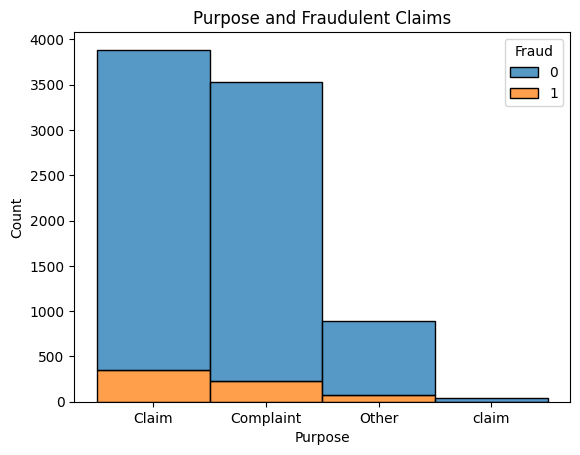

In [21]:
sns.histplot(x = 'Purpose', data = df, hue = 'Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')

## Data Preprocessing Part 2

### Outlier Removal

In [22]:
# Removing outliners from claim value column using IQR method

Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)

IQR = Q3 - Q1

df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) |(df['Claim_Value'] > (Q3 + 1.5 * IQR)))]

### Label Encoding the Object Datatypes

In [23]:
#Label encoding Object
le = LabelEncoder()

# columns for label encoding
cols = df.select_dtypes(include=['object']).columns

# label encoding
for col in cols:
    le.fit(df[col])
    df[col] = le.transform(df[col])
    print(col, df[col].unique())

Region [2 0 7 6 4 1 5 3]
State [ 1  3  0  5 11 21 10 20 17 13 19 16  4 14  2 15 12 18  6  9  7  8]
Area [0 1]
City [ 8 16  9  1 11 12  2 13  7 15 14  6 17 26  4 18 20 19 25 24 10  3  0 22
 21  5 23]
Consumer_profile [1 0]
Product_category [1 0]
Product_type [0 1]
AC_1001_Issue [0 1 2]
AC_1002_Issue [1 0 2]
AC_1003_Issue [2 0 1]
TV_2001_Issue [0 1 2]
TV_2002_Issue [0 1 2]
TV_2003_Issue [0 1 2]
Purchased_from [2 0 1]
Purpose [0 1 2 3]


## Correlation Matrix Heatmap

<Axes: >

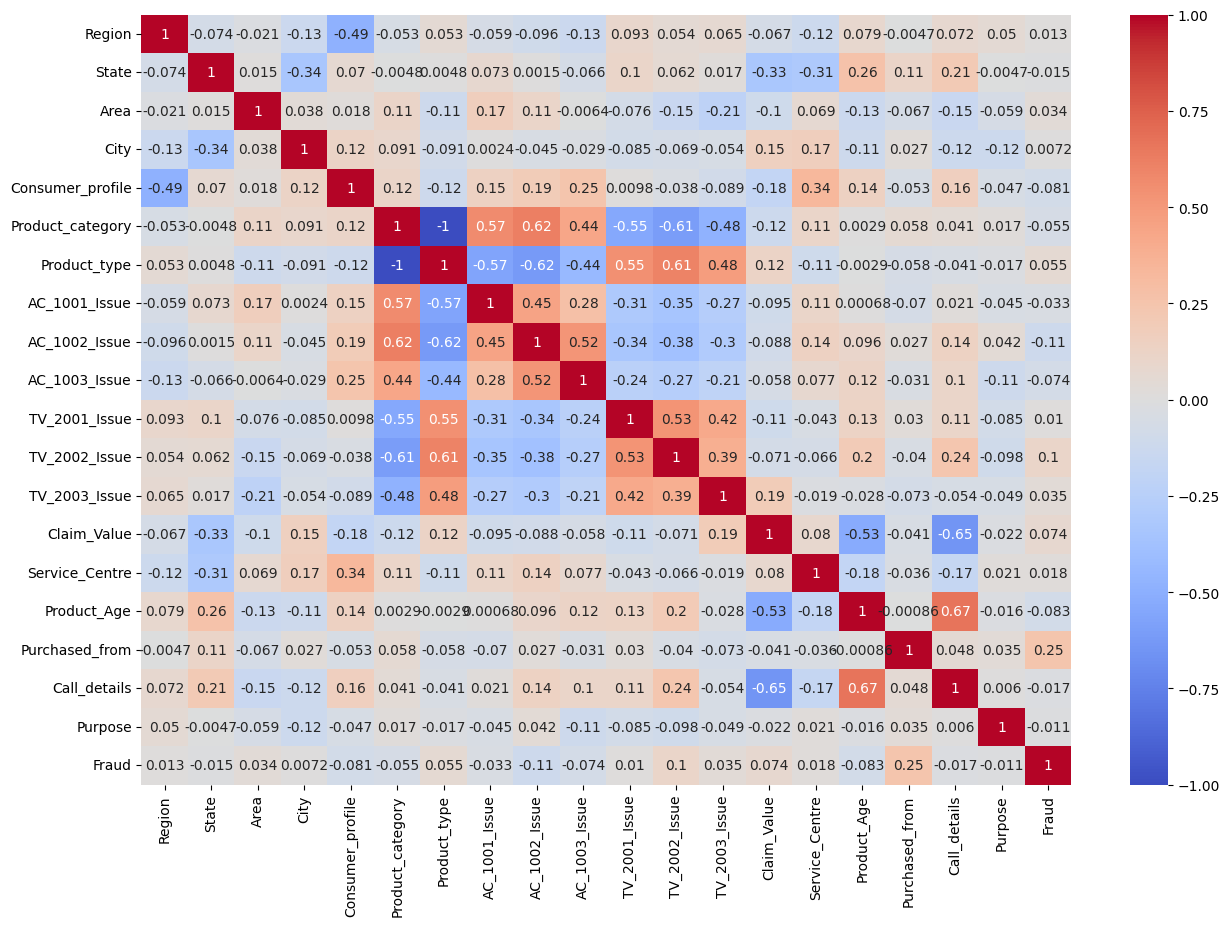

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## Train Test Split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud',axis=1), df['Fraud'], test_size=0.30, random_state=42)

## Model Building

I will be using the following classification models:
- Decision Tree Classifier
- Random Forest Classifier
- Logistic Regression

### Decision Tree Classifier

In [26]:
#Decision Tree Classifier Object
dtree = DecisionTreeClassifier()

Hyperparameter Tuning using GridSearchCV

In [27]:
#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10],
    'min_samples_split': [2,4,6,8,10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Decision Tree Classifier
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Decision Tree Classifier
print(grid.best_params_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 42}


In [28]:
#Best estimator for Decision Tree Classifier
dtree = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Decision Tree Classifier to the training data
dtree.fit(X_train,y_train)

#training accuracy
print(dtree.score(X_train,y_train))

#prediction on test data
d_pred = dtree.predict(X_test)

0.9445069366329208


### Random Forest Classifier

In [29]:
#Random Forest Classifier Object
rfc = RandomForestClassifier()

Hyperparameter Tuning using GridSearchCV

In [30]:
#parameters for grid search
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

#Grid Search Object with Random Forest Classifier
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')

#Fitting the grid search object to the training data
grid.fit(X_train,y_train)

#Best parameters for Random Forest Classifier
print(grid.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
{'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [31]:
#random forest classifier with best parameters
rfc = RandomForestClassifier(criterion='gini', max_depth=2, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the Random Forest Classifier to the training data
rfc.fit(X_train,y_train)

#training accuracy
print(rfc.score(X_train,y_train))

#prediction on test data
r_pred = rfc.predict(X_test)

0.9332583427071616


### Logistic Regression

In [32]:

# --- THE FIX: Create a Pipeline ---
# This pipeline does 3 things automatically in order:
# 1. Imputer: Fills any hidden NaNs with the median value (Fixes your error)
# 2. Scaler: Adjusts the numbers so 25000 and 1 don't confuse the model
# 3. Model: Runs Logistic Regression
pipeline = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(), 
    LogisticRegression(max_iter=3000, random_state=42)
)

# --- TRAIN ---
print("Training Logistic Regression with auto-cleanup...")
pipeline.fit(X_train, y_train)

# --- PREDICT ---
y_pred_log = pipeline.predict(X_test)

# --- RESULTS ---
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Training Logistic Regression with auto-cleanup...
Logistic Regression Accuracy: 0.9181977252843394

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      2115
           1       0.06      0.01      0.01       171

    accuracy                           0.92      2286
   macro avg       0.49      0.50      0.48      2286
weighted avg       0.86      0.92      0.89      2286



In [33]:
# #Logistic Regression Object
# lr = LogisticRegression(max_iter=3000, random_state=42)

# #Fitting the Logistic Regression to the training data
# lr.fit(X_train,y_train)

# #training accuracy
# print(lr.score(X_train,y_train))

# #prediction on test data
# l_pred = lr.predict(X_test)

## Model Evaluation

### Confusion Matrix Heatmap

Text(0.5, 1.0, 'Logistic Regression')

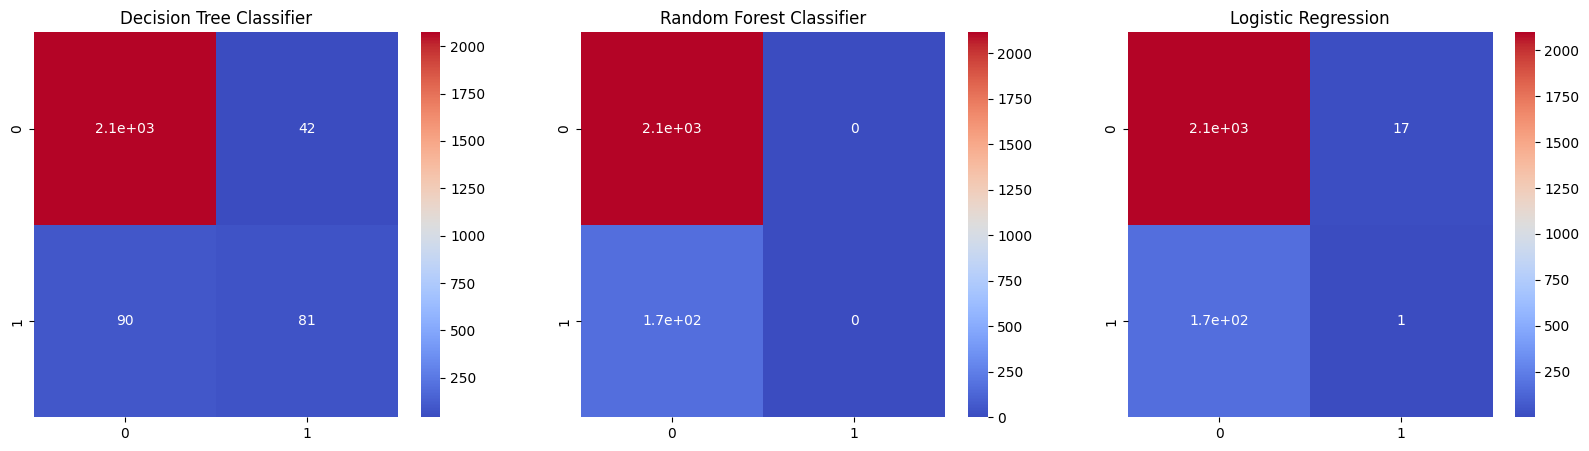

In [34]:
fig, ax = plt.subplots(1,3,figsize=(20,5))

#confusion matrix for Decision Tree Classifier
sns.heatmap(confusion_matrix(y_test,d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree Classifier')

#confusion matrix for Random Forest Classifier
sns.heatmap(confusion_matrix(y_test,r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest Classifier')

#confusion matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test,y_pred_log), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')

### Classification Report

In [35]:
#classification report for Decision Tree Classifier
print(classification_report(y_test,d_pred))

#classification report for Random Forest Classifier
print(classification_report(y_test,r_pred))

#classification report for Logistic Regression
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2115
           1       0.66      0.47      0.55       171

    accuracy                           0.94      2286
   macro avg       0.81      0.73      0.76      2286
weighted avg       0.94      0.94      0.94      2286

              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2115
           1       0.00      0.00      0.00       171

    accuracy                           0.93      2286
   macro avg       0.46      0.50      0.48      2286
weighted avg       0.86      0.93      0.89      2286

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      2115
           1       0.06      0.01      0.01       171

    accuracy                           0.92      2286
   macro avg       0.49      0.50      0.48      2286
weighted avg       0.86      0.92      0.89      2286



c:\Navansh\projects\Warranty Claims Fraud Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Navansh\projects\Warranty Claims Fraud Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Navansh\projects\Warranty Claims Fraud Prediction\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _war

In [36]:
print('==================== Decision Tree Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,d_pred))
print('R2 Score: ', r2_score(y_test,d_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,d_pred))

print('==================== Random Forest Classifier ====================')
print('Accuracy Score: ', accuracy_score(y_test,r_pred))
print('R2 Score: ', r2_score(y_test,r_pred))
print('Mean Squared Error: ', mean_squared_error(y_test,r_pred))

print('==================== Logistic Regression =========================')
print('Accuracy Score: ', accuracy_score(y_test,y_pred_log))
print('R2 Score: ', r2_score(y_test,y_pred_log))
print('Mean Squared Error: ', mean_squared_error(y_test,y_pred_log))


==================== Decision Tree Classifier ====================
Accuracy Score:  0.9422572178477691
R2 Score:  0.16565882792086606
Mean Squared Error:  0.05774278215223097
==================== Random Forest Classifier ====================
Accuracy Score:  0.9251968503937008
R2 Score:  -0.08085106382978724
Mean Squared Error:  0.07480314960629922
==================== Logistic Regression =========================
Accuracy Score:  0.9181977252843394
R2 Score:  -0.18198332711210652
Mean Squared Error:  0.08180227471566054


## Feature Importance

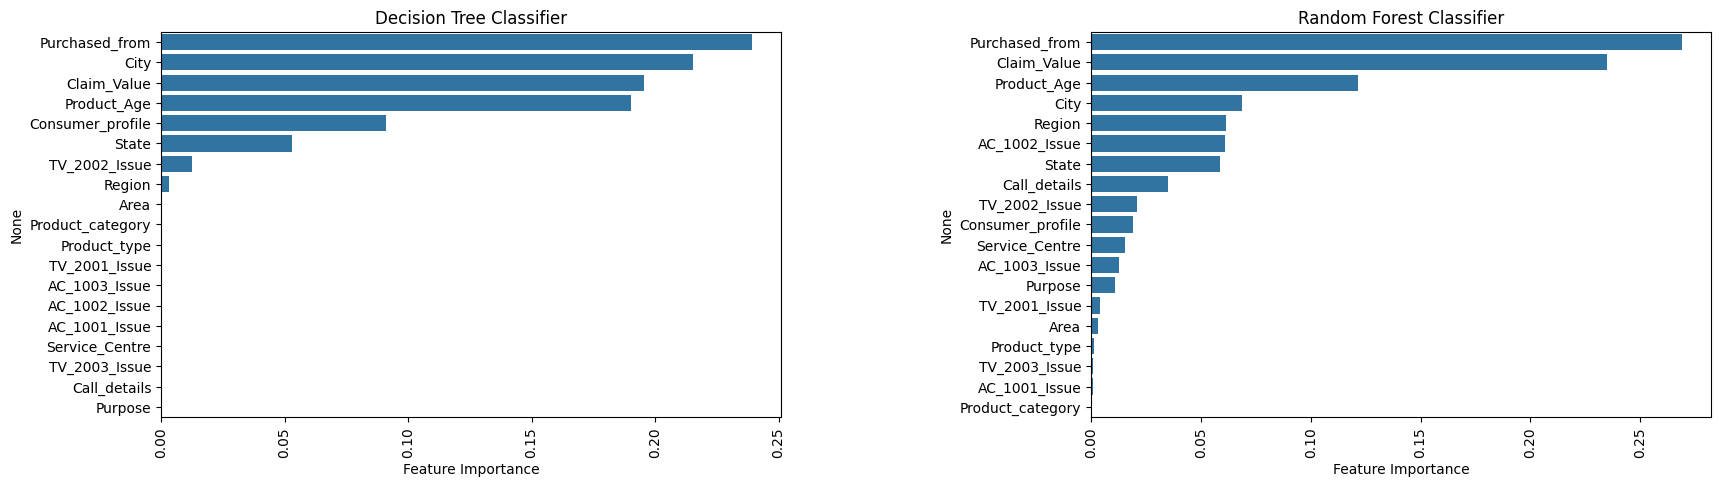

In [37]:
#feature importance for Decision Tree Classifier
feature_importance_d = pd.DataFrame(dtree.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

#feature importance for Random Forest Classifier
feature_importance_r = pd.DataFrame(rfc.feature_importances_, index=X_train.columns, columns=['Feature Importance']).sort_values('Feature Importance', ascending=False)

fig, ax = plt.subplots(1,2,figsize=(20,5))
#space between subplots
fig.subplots_adjust(wspace=0.5)
sns.barplot(y=feature_importance_d.index, x=feature_importance_d['Feature Importance'], ax=ax[0]).set_title('Decision Tree Classifier')
ax[0].xaxis.set_tick_params(rotation=90)
sns.barplot(y=feature_importance_r.index, x=feature_importance_r['Feature Importance'], ax=ax[1]).set_title('Random Forest Classifier')
ax[1].xaxis.set_tick_params(rotation=90)